## Exploring the ToxPost data


In [1]:
import os
os.chdir("..")
print(f'the current working directory is {os.getcwd()}')

In [2]:
import random
import pandas as pd
from src.load import load_dataframe
from src.visualize import desc_stats
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import the raw training data:

raw_data_path = "./data/raw/data.csv"
data = load_dataframe(raw_data_path, header=True, id_tag=True)
labels = data.drop('comment_text', axis='columns')

In [4]:
data.sample(n=10)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
98213,Requested move \n\n:Bình Định province → – Re...,0,0,0,0,0,0
104037,but an article (Aerei august 1998) reported th...,0,0,0,0,0,0
22862,Keep this for record from:\n\nFrom: Lika Valen...,0,0,0,0,0,0
51341,Sexual Orientation\n\nThere are rumors that Bo...,1,0,0,0,0,0
142903,Assembly of Good Christians has a bona fide me...,0,0,0,0,0,0
51942,"""\nFYI, I just added my co-nom, WS. ''''''thor """,0,0,0,0,0,0
90123,Would you mind telling me why? It would help m...,0,0,0,0,0,0
79987,"""\n\nYep, user view obviously has no bearing o...",0,0,0,0,0,0
9916,Possibly useful sources\nhttp://www.mmdnewswir...,0,0,0,0,0,0
106475,"""\nparagraph opens with """"Although Non-Muslims...",0,0,0,0,0,0


In [5]:
comment_lengths = data.loc[:,'comment_text'].apply(str.split).apply(len)

We'll give some information on the frequentist stats of the comment lengths. To this end, we use the desc_stats function built for this purpose:

In [7]:
desc_stats(comment_lengths)

count                     159571
mean                     67.2735
std                      99.2307
min                            1
25%                           17
50%                           36
75%                           75
max                         1411
IQR                           58
outlier range     [-70.0, 162.0]
nr of outliers       [0, 145025]
Name: comment_text, dtype: object

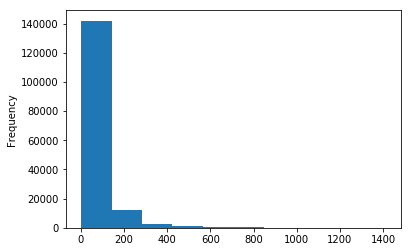

In [39]:
comment_lengths.plot.hist()



the percentage of nonzero comments is toxic            0.095844
severe_toxic     0.009996
obscene          0.052948
threat           0.002996
insult           0.049364
identity_hate    0.008805
dtype: float64

the labels are distributed as follows:


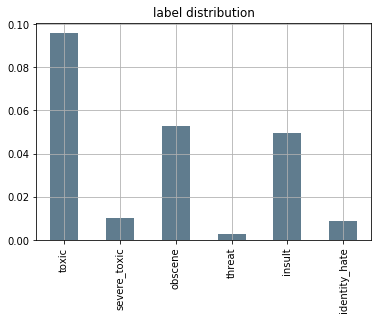

In [16]:
nonzero_comments = labels.apply(sum).div(len(labels))
print(f"\nthe percentage of nonzero comments is {}\n")
print("the labels are distributed as follows:")
(labels.sum(axis=0)/len(labels)).plot.bar(color='#607c8e')
plt.title('label distribution')
plt.grid()

We'll need to bootstrap later on..First, we also consider the distribution of comment lengths: